In [90]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML

In [91]:
#Import of Ballon d'or data
df_ballon = pandas.read_csv("ballon-d-or.csv", sep=",", header=0)
df_ballon.head()

,Unnamed: 0,year,rank,player,team,points,percentages
0,0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90
1,1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48
2,2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61
3,3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54
4,4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45


In [92]:
df_ballon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
Unnamed: 0     191 non-null int64
year           191 non-null int64
rank           191 non-null object
player         191 non-null object
team           191 non-null object
points         173 non-null float64
percentages    191 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.5+ KB


In [93]:
#Train data description
df_ballon.describe()

,Unnamed: 0,year,points,percentages
count,191.0000,191.000000,173.000000,191.000000
mean,95.0000,1986.863874,119.393064,32.112775
std,55.2811,18.268244,133.721058,12.650955
min,0.0000,1956.000000,16.000000,7.860000
25%,47.5000,1971.000000,48.000000,22.940000
50%,95.0000,1987.000000,79.000000,29.890000
75%,142.5000,2002.500000,133.000000,41.000000
max,190.0000,2018.000000,946.000000,68.320000


In [94]:
# Check for any NaN values
df_ballon.isnull().any()

Unnamed: 0     False
year           False
rank           False
player         False
team           False
points          True
percentages    False
dtype: bool

In [95]:
#Filling the NaN by mean of the whole column values
df_ballon['points'].fillna(value = df_ballon['points'].mean(), inplace = True)

In [96]:
#Names of columns in DF
df_ballon.columns

Index(['Unnamed: 0', 'year', 'rank', 'player', 'team', 'points',
       'percentages'],
      dtype='object')

In [97]:
#Choosen Parameters
chosen_columns = [
    'year',
    'rank',
    'player',
    'team',
    'points',
    'percentages'
]

In [98]:
#Main DF
df = pandas.DataFrame(df_ballon, columns = chosen_columns)
df.sample(5)

,year,rank,player,team,points,percentages
59,1975,2nd,Franz Beckenbauer,Bayern Munich,42.0,21.99
32,1966,2nd,Eusébio,Benfica,80.0,36.36
74,1980,2nd,Bernd Schuster,Barcelona,34.0,17.99
163,2009,3rd,Xavi,Barcelona,170.0,19.41
56,1974,2nd,Franz Beckenbauer,Bayern Munich,105.0,41.02


In [99]:
# Transferring rank into float and making an auxiliary variable called Winning_index
premier_league = ['Arsenal', 'Blackpool', 'Chelsea', 'Fulham', 'Liverpool', 'Manchester United', 'Newcastle United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers']

primera_division = ['Atlético Madrid', 'Barcelona', 'Real Madrid']

serie_a = ['Cagliari', 'Hellas Verona', 'Internazionale', 'Juventus', 'Milan']

ligue_1 = ['Bordeaux', 'Marseille', 'Nancy', 'Paris Saint-Germain', 'Saint-Étienne', 'Stade de Reims']

bundesliga = ['Bayern Munich', 'Borussia Dortmund', 'Borussia Mönchengladbach', 'Hamburg', 'Köln', 'Rot-Weiss Essen']


def club_to_league(df_value):
    try:
        element = df_value

        if element in premier_league:
            value = 'Premier League'
        elif element in primera_division:
            value = 'Primera Division'
        elif element in serie_a:
            value = 'Seria A'
        elif element in ligue_1:
            value = 'Ligue 1'
        elif element in bundesliga:
            value = 'Bundesliga'
        else: 
            value = 'Others'
    except ValueError:
        value = 0
    return value



def value_to_int(df_value):
    try:
        element = df_value

        if element == '1st':
            value = 1
        elif element == '2nd':
            value = 2
        else: 
            value = 3
    except ValueError:
        value = 0
    return value

def winning_index(df_value):
    try:
        element = df_value

        if element == '1st':
            value = 1
        else: 
            value = 0
    except ValueError:
        value = 0
    return value

df['League'] = df['team'].apply(club_to_league)
df['rank_float'] = df['rank'].apply(value_to_int)
df['Winning_index'] = df['rank'].apply(winning_index)
df.head()

,year,rank,player,team,points,percentages,League,rank_float,Winning_index
0,1956,1st,Stanley Matthews,Blackpool,47.0,37.90,Premier League,1,1
1,1956,2nd,Alfredo Di Stéfano,Real Madrid,44.0,35.48,Primera Division,2,0
2,1956,3rd,Raymond Kopa,Real Madrid,33.0,26.61,Primera Division,3,0
3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.0,58.54,Primera Division,1,1
4,1957,2nd,Billy Wright,Wolverhampton Wanderers,19.0,15.45,Premier League,2,0


In [100]:
# The best player per each club history by ranking points
 display(HTML(df.iloc[df.groupby(df['team'])['points'].idxmax()][['team', 'player', 'points']].to_html(index=False)))

team,player,points
Ajax,Johan Cruyff,116.0
Anderlecht,Rob Rensenbrink,75.0
Arsenal,Thierry Henry,128.0
Atlético Madrid,Antoine Griezmann,414.0
Barcelona,Lionel Messi,670.0
Bayern Munich,Karl-Heinz Rummenigge,122.0
Benfica,Eusébio,80.0
Blackpool,Stanley Matthews,47.0
Bordeaux,Alain Giresse,64.0
Borussia Dortmund,Matthias Sammer,144.0


In [101]:
#Last 5 Years Winners
df.loc[(df['year'] > 2013) & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,rank_float,Winning_index
176,2014,1st,Cristiano Ronaldo,Real Madrid,119.393064,37.66,Primera Division,1,1
179,2015,1st,Lionel Messi,Barcelona,119.393064,41.33,Primera Division,1,1
182,2016,1st,Cristiano Ronaldo,Real Madrid,745.000000,59.17,Primera Division,1,1
185,2017,1st,Cristiano Ronaldo,Real Madrid,946.000000,47.85,Primera Division,1,1
188,2018,1st,Luka Modrić,Real Madrid,753.000000,45.83,Primera Division,1,1


In [102]:
#Real Madrid Winners
df.loc[(df['team'] == "Real Madrid") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,rank_float,Winning_index
3,1957,1st,Alfredo Di Stéfano,Real Madrid,72.000000,58.54,Primera Division,1,1
7,1958,1st,Raymond Kopa,Real Madrid,71.000000,52.99,Primera Division,1,1
10,1959,1st,Alfredo Di Stéfano,Real Madrid,80.000000,54.79,Primera Division,1,1
134,2000,1st,Luís Figo,Real Madrid,197.000000,42.55,Primera Division,1,1
140,2002,1st,Ronaldo,Real Madrid,169.000000,39.86,Primera Division,1,1
152,2006,1st,Fabio Cannavaro,Real Madrid,173.000000,41.39,Primera Division,1,1
173,2013,1st,Cristiano Ronaldo,Real Madrid,119.393064,27.99,Primera Division,1,1
176,2014,1st,Cristiano Ronaldo,Real Madrid,119.393064,37.66,Primera Division,1,1
182,2016,1st,Cristiano Ronaldo,Real Madrid,745.000000,59.17,Primera Division,1,1
185,2017,1st,Cristiano Ronaldo,Real Madrid,946.000000,47.85,Primera Division,1,1


In [103]:
#Barcelona Winners
df.loc[(df['team'] == "Barcelona") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,rank_float,Winning_index
13,1960,1st,Luis Suárez,Barcelona,54.000000,43.55,Primera Division,1,1
52,1973,1st,Johan Cruyff,Barcelona,96.000000,51.34,Primera Division,1,1
55,1974,1st,Johan Cruyff,Barcelona,116.000000,45.31,Primera Division,1,1
116,1994,1st,Hristo Stoichkov,Barcelona,210.000000,46.15,Primera Division,1,1
131,1999,1st,Rivaldo,Barcelona,219.000000,50.11,Primera Division,1,1
149,2005,1st,Ronaldinho,Barcelona,225.000000,43.69,Primera Division,1,1
161,2009,1st,Lionel Messi,Barcelona,473.000000,54.00,Primera Division,1,1
164,2010,1st,Lionel Messi,Barcelona,119.393064,22.65,Primera Division,1,1
167,2011,1st,Lionel Messi,Barcelona,119.393064,47.88,Primera Division,1,1
170,2012,1st,Lionel Messi,Barcelona,119.393064,41.60,Primera Division,1,1


In [104]:
#Manchester United Winners
df.loc[(df['team'] == "Manchester United") & (df['Winning_index'] == 1)]

,year,rank,player,team,points,percentages,League,rank_float,Winning_index
25,1964,1st,Denis Law,Manchester United,61.0,42.96,Premier League,1,1
31,1966,1st,Bobby Charlton,Manchester United,81.0,36.82,Premier League,1,1
37,1968,1st,George Best,Manchester United,61.0,38.12,Premier League,1,1
158,2008,1st,Cristiano Ronaldo,Manchester United,446.0,49.23,Premier League,1,1


Text(0.5,1,'Top 5 teams with highest points score')

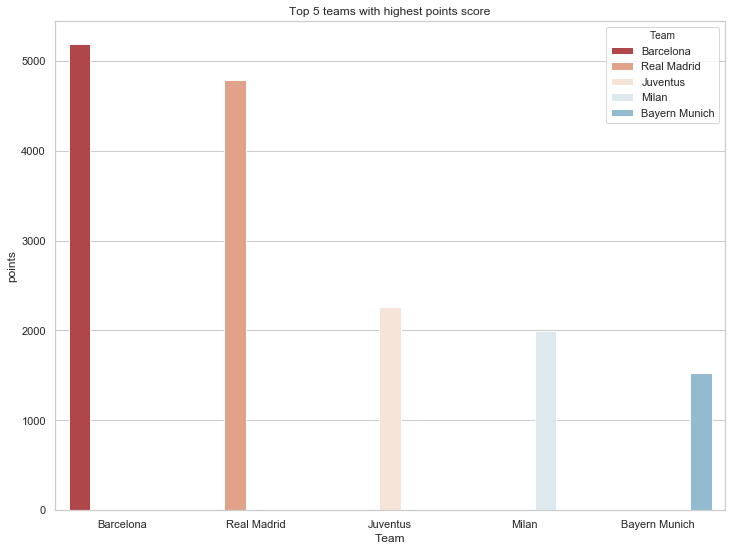

In [149]:
# Top five the most points collected Clubs
df_ts = df.groupby(['team'])['points'].sum().sort_values(ascending = False).head(5)
df_ts = pandas.DataFrame(data = df_ts, columns = ['points'])
index_list = list(df_ts.index)
df_ts.insert(loc = 1, column = 'Team', value = index_list)
sns.set(rc={'figure.figsize':(12,9)})
sns.set(style="whitegrid", palette="RdBu")
sns.set_color_codes("dark")
sns.barplot(x="Team", y="points", data=df_ts, hue='Team')
plt.title('Top 5 teams with highest points score')


Text(0.5,1,'Most rewarded Leagues')

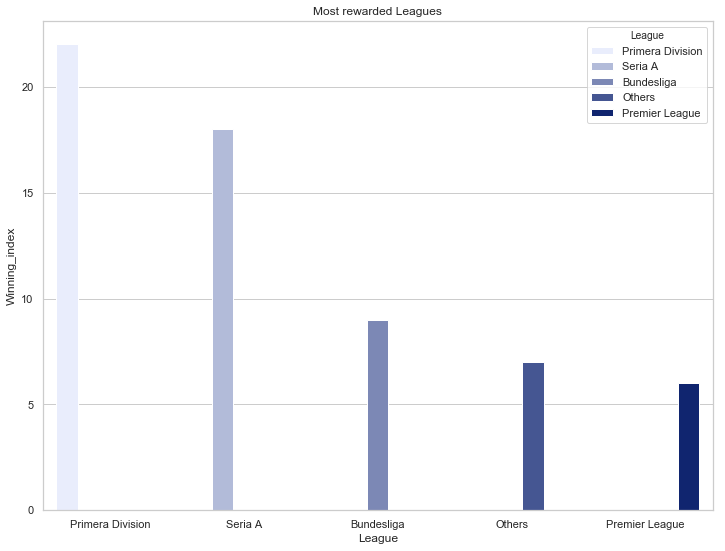

In [151]:
# Top five the most rewarded Leagues by Reward Winning Index
df_leagues = df.groupby(['League'])['Winning_index'].sum().sort_values(ascending = False).head(5)
df_leagues = pandas.DataFrame(data = df_leagues, columns = ['Winning_index'])
index_list = list(df_leagues.index)
df_leagues.insert(loc = 1, column = 'League', value = index_list)

sns.barplot(x="League", y="Winning_index", data=df_leagues, hue='League', color="b")
plt.title('Most rewarded Leagues')


Text(0.5,1,'Top 5 teams with highest amout of rewards')

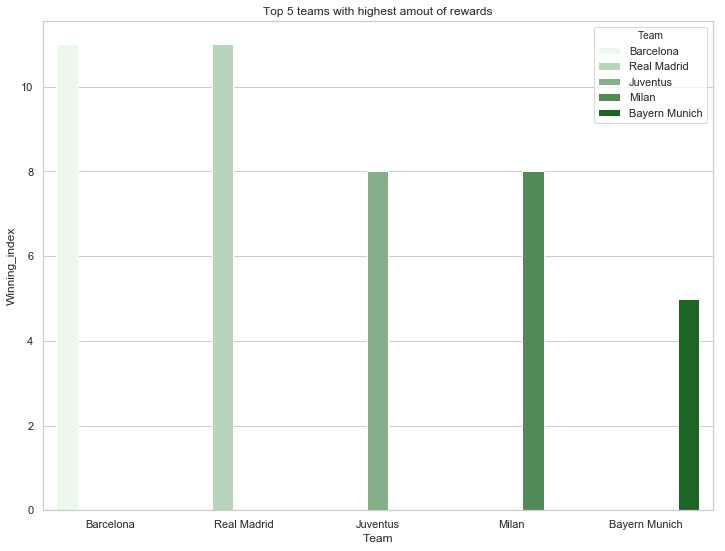

In [152]:
# Top five the most rewarded Clubs by Reward Winning Index
df_winning_team = df.groupby(['team'])['Winning_index'].sum().sort_values(ascending = False).head(5)
df_winning_team = pandas.DataFrame(data = df_winning_team, columns = ['Winning_index'])
index_list = list(df_winning_team.index)
df_winning_team.insert(loc = 1, column = 'Team', value = index_list)

sns.barplot(x="Team", y="Winning_index", data=df_winning_team, hue='Team', color="g")
plt.title('Top 5 teams with highest amout of rewards')

Text(0.5,1,'Top 5 players with highest amount of rewards')

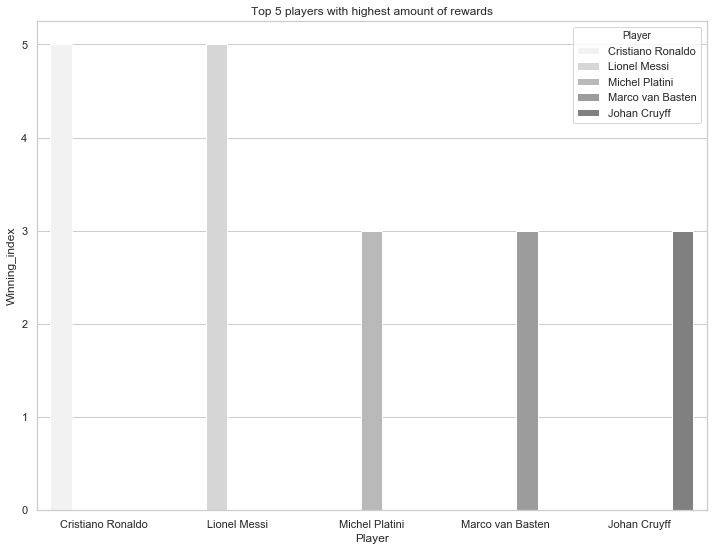

In [158]:
# Top five the most rewarded Players
df_winning = df.groupby(['player'])['Winning_index'].sum().sort_values(ascending = False).head(5)
df_winning = pandas.DataFrame(data = df_winning, columns = ['Winning_index'])
index_list = list(df_winning.index)
df_winning.insert(loc = 1, column = 'Player', value = index_list)


sns.barplot(x="Player", y="Winning_index", data=df_winning, hue='Player', color="grey")
plt.title('Top 5 players with highest amount of rewards')

Text(0.5,1,'Most unquestionable victories by percentage')

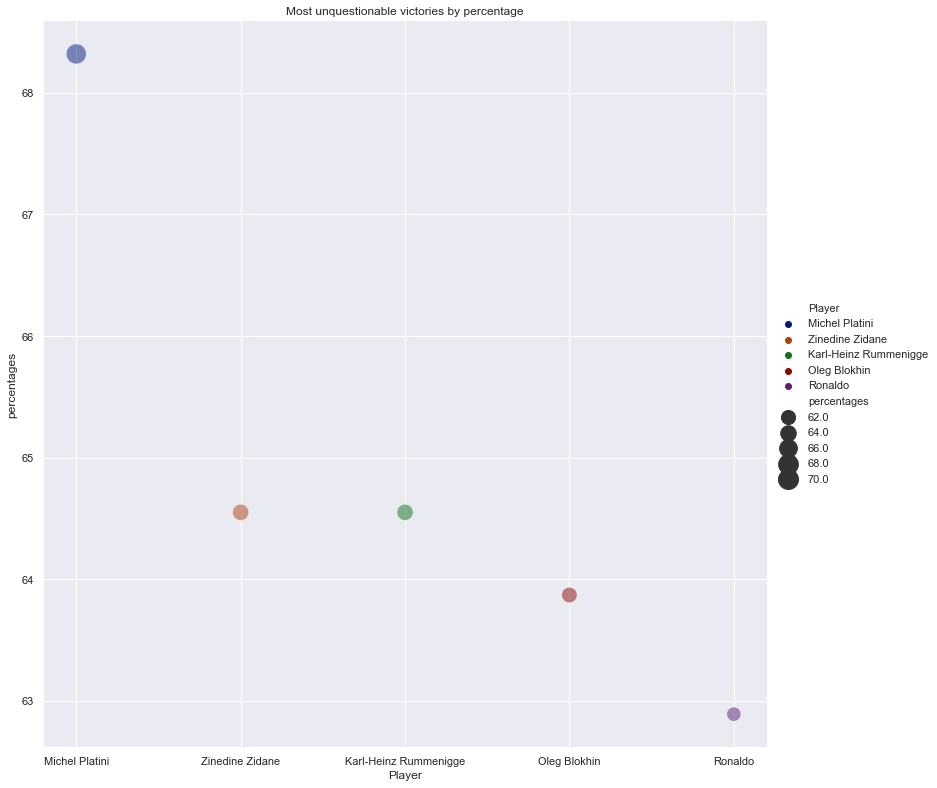

In [169]:
# The most unquestionable victories
df_maxper = df.groupby(['player'])['percentages'].max().sort_values(ascending = False).head(5)
df_maxper = pandas.DataFrame(data = df_maxper, columns = ['percentages'])
index_list = list(df_maxper.index)
df_maxper.insert(loc = 1, column = 'Player', value = index_list)
sns.relplot(x="Player", y="percentages", hue="Player", size="percentages",
            sizes=(200, 400), alpha=.5, palette="dark",
            height=11, data=df_maxper, legend="brief")
plt.title('Most unquestionable victories by percentage')